<H1 style="text-align:center;">
Finding Patterns
</H1>
<hr style="height:5px;">

## Hierarchical clustering
<hr style="height:2px;">

In this example, we apply hierarchical clustering to the Iris data. The data is first normalized with the `StandardScaler` object. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# Loading the iris data
iris = datasets.load_iris()
X = iris.data  # array for the features
y = iris.target  # array for the target
feature_names = iris.feature_names   # feature names
target_names = iris.target_names   # target names

# z-score normalization using fit_transform method
X_norm = StandardScaler().fit_transform(X)

Then the hierarchical clustering is implemented as an `AgglomerativeClustering` object available in the `sklearn.cluster` library. We set the number of clusters to 3 by setting the `n_clusters` parameter. We use the Ward method for linkage calculation by setting the `linkage` parameter. 

In [2]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

Then we learn from the normalized data `X_norm` by using the `fit` method associated with the clustering object `hc`. The resulting cluster assignments are stored in the attribute `labels_` of the transformation object `hc`. We store this information in the array `y_clus`.

In [3]:
hc.fit(X_norm)  # actually fitting the data
y_clus = hc.labels_   # clustering info resulting from hieararchical

We visualize the resulting clusters with a scatter plot, plotting the sepal length on the x-axis and the petal width on the y-axis. Different clusters are indicated by different colors.

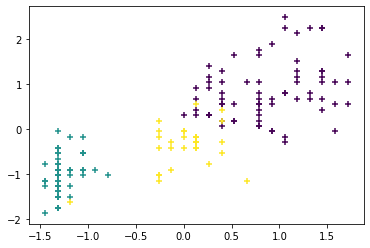

In [4]:
# Plotting the clusters
plt.scatter(X_norm[:,3],X_norm[:,0],c=y_clus,marker='+')
plt.show()

Next, we generate a dendrogram describing distances between different clusters. To do so, we use the `linkage` function to calculate distances between observations, and the `dendrogram` function to plot the actual dendrogram. Both functions are available in the `scipy.cluster.hierarchy` library. In the linkage function, we provide the normalized features `X_norm` and the linkage method `ward` (for the Ward method). The resulting distance matrix `D` is then used in the `dendrogram` function.

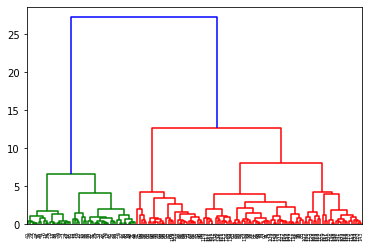

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

D = linkage(X_norm, 'ward')
dn = dendrogram(D)
plt.show()

## K-means clustering
<hr style="height:2px;">

K-means clustering is implemented as the `KMeans` transformation object available in the `sklearn.cluster` library. We define the clustering object `km` with the number of clusters `n_clusters=3`. We learn from the normalized data `X_norm`, and store the resulting cluster assignment information in the array `y_clus`.

In [6]:
# K-means clustering
km = KMeans(n_clusters=3)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means

As before, we plot the normalized sepal length (x-axis) vs the normalized petal width (y-axis), with different clusters indicated by different colors.

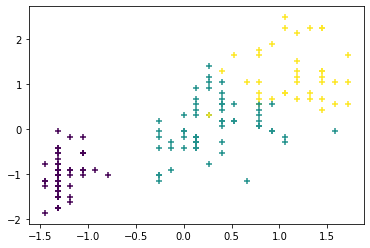

In [7]:
# Plotting the clusters
plt.scatter(X_norm[:,3],X_norm[:,0],c=y_clus,marker='+')
plt.show()

As in many clustering algorithms, you have to specify the number of clusters K in the k-means clustering method. What can we do if we do not know the number of clusters beforehand? One way we can determine the number of clusters is to plot the sum of squared distances from cluster centroids (i.e., how far observations are from the centrolids), also known as the *inertia*. We can get the inertia from k-means clustering by the attribute `inertia_`.

We run the K-means algorithm with different numbers of clusters, and calculate the corresponding *inertiae*. Then we plot the inertiae against the number of clusters. The inertia decreases as the number of clusters increases. However, there is an elbow in this plot where the rate of decrease slows down. In this particular example, we calculate the inertia up to 20 clusters.

In [8]:
SSE = []
for iClus in range(1,21):
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(X_norm)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

In brief, we use a for loop to run k-means clustering with k=1 to 20 clusters. With for each value of k, we record the corresponding inertia and store in a list `SSE`. Then we plot k (number of clusters, x-axis) against the inertiae (y-axis).

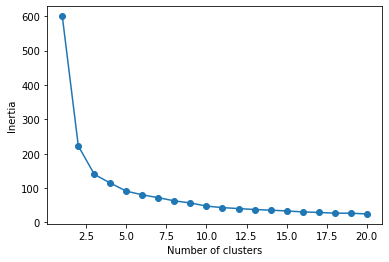

In [9]:
# plotting the sum of square distance (a.k.a., inertia)
plt.plot(np.arange(1,21),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In the plot, the rate of decrease seems to slow down (i.e., the *elbow*) at k=3. It should be noted that this *elbow* method is somewhat subjective; someone can easily choose k=2 or k=4 as the elbow. Moreover, this method requires repeating k-means clustering many times, which may not be possible for large data.

## DBSCAN clustering
<hr style="height:2px;">

DBSCAN clustering is implemented as the `DBSCAN` transformation object available in the `sklearn.cluster` library. We define the clustering object `dbscan`, and we learn from the normalized data `X_norm`, and store the resulting cluster assignment information in the array `y_clus`. In addition, the indices for core points are available as the attribute `core_sample_indices_` so we store that information in `indCore`.

In [10]:
# DBSCAN clustering
dbscan = DBSCAN()  # defining the clustering object
dbscan.fit(X_norm)  # fitting the data
y_clus = dbscan.labels_   # cluster labels
indCore = dbscan.core_sample_indices_   # indices of core points

As before, we plot the normalized sepal length (x-axis) vs the normalized petal width (y-axis), with different clusters indicated by different colors. A cluster index of -1 corresponds to a noise points, whereas all the other indices are integers corresponding to different clusters. In the plot, core points are plotted with larger markers, and noise points are plotted in red.

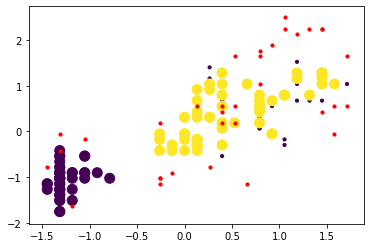

In [11]:
# plotting non-noise points
plt.scatter(X_norm[y_clus>0,3],X_norm[y_clus>0,0], c=y_clus[y_clus>0],
            marker='o', s=10)
# plotting core points
plt.scatter(X_norm[indCore,3], X_norm[indCore,0],c=y_clus[indCore],
            marker='o', s=100)
# plotting noise points
plt.scatter(X_norm[y_clus==-1,3],X_norm[y_clus==-1,0], c='r',
            marker='o', s=10)
plt.show()